# Exercise 10: Regressions 

In this notebook, we'll see how to use `python` to preform regressions using the `statsmodels` package. `scikit-learn` is also a very powerful package for regressions and machine learning in general, but we won't have time to get into that. 

## Table of Contents

* Linear Regressions
    * From scratch
    * Using statsmodels
* Non-linear Regressions
    * Example non-linear regression
* Avoiding overfitting
    * Using regularizers
    * Cross-validation

## Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

# For retina displays only 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%matplotlib inline

## Linear regressions

In [58]:
# Generate 'random' data
N = 100
slope = 0.3
yint = 2
noise_scale = .7
x_mean = 1.5
x_scale = 3

np.random.seed(0)
X = x_scale * np.random.randn(N) + x_mean   # Array of X values
res = noise_scale * np.random.randn(N)      # Generate residual terms
Y = yint + slope * X + res                  # Actual values of Y

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'Y': Y}
)

# Show the dataframe
df

,X,Y
0,6.792157,5.355853
1,2.700472,1.866710
2,4.436214,2.441525
3,8.222680,5.145382
4,7.102674,3.309616
...,...,...
95,3.619720,2.965833
96,1.531500,2.999703
97,6.857611,4.633736
98,1.880736,4.078486


### Plotting the data

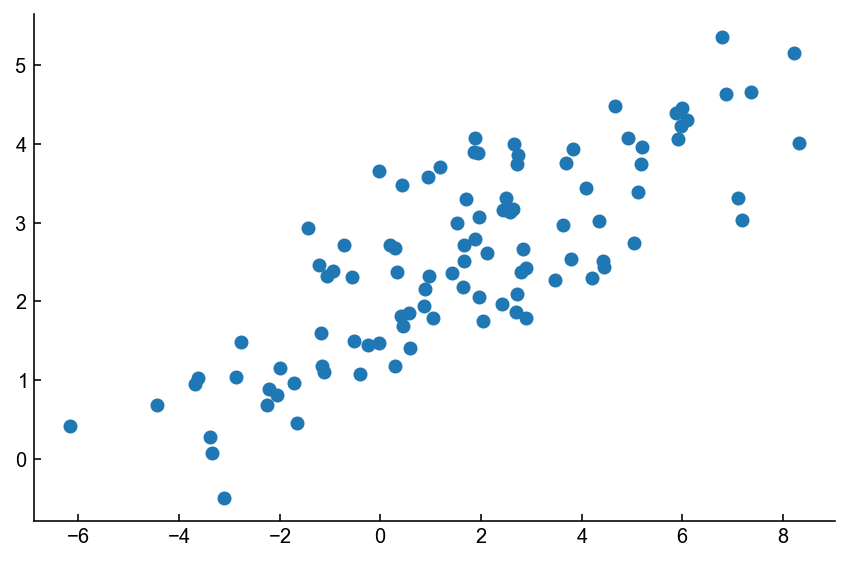

In [20]:
fig, ax = plt.subplots()
ax.scatter(X, Y)

## Calculating the optimal OLS paramters using the formulae from class

In [14]:
# Calculate the mean of X and y
xmean = df['X'].mean()
ymean = df['Y'].mean()

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['Y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha\t= {alpha}\tvs {yint}')
print(f'beta\t= {beta}\tvs {slope}')

alpha	= 2.012462707795527	vs 2
beta	= 0.326762967827489	vs 0.3


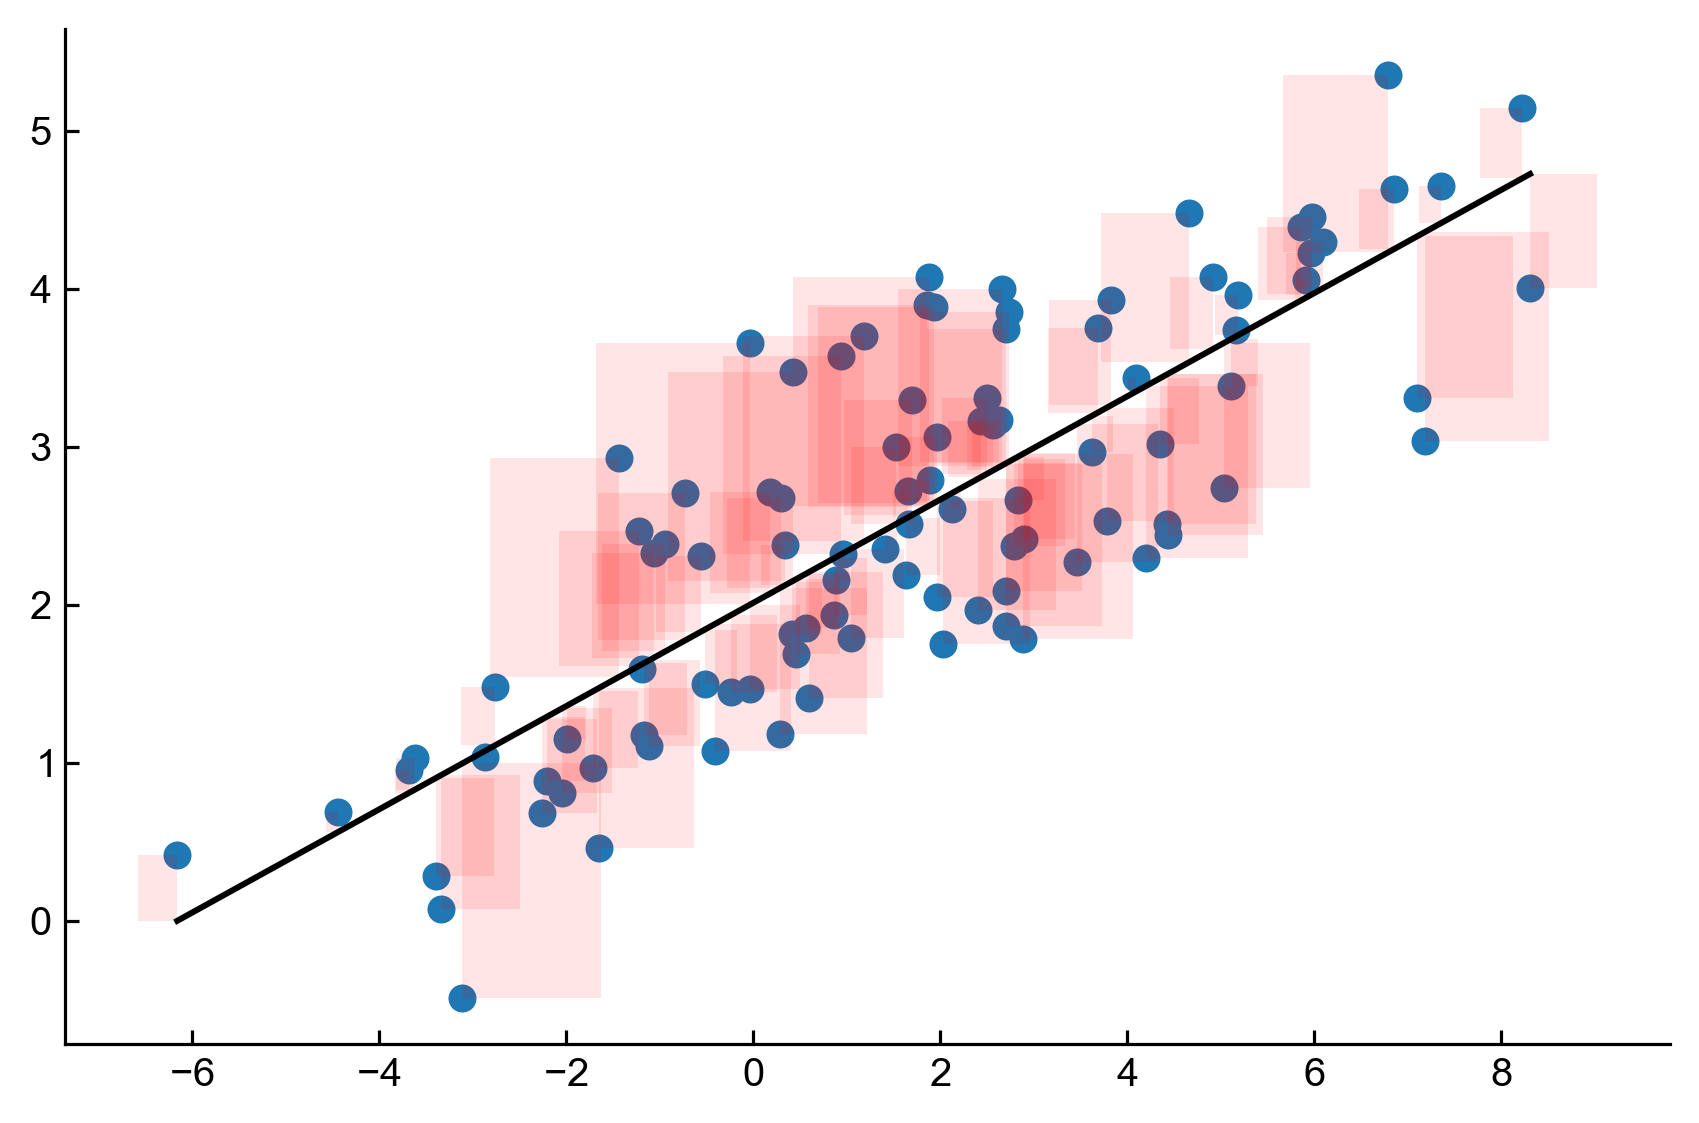

In [37]:
fig, ax = plt.subplots()
ax.scatter(X, Y)
x_pred = np.linspace(df['X'].min(), df['X'].max(), 1000)
y_pred = alpha + beta * x_pred
ax.plot(x_pred, y_pred, color='k')

# Plotting residual error
for x, y in zip(X, Y):
    dy = alpha + beta*x - y
    #ax.plot([x, x], [y, y + dy], color='r', lw=.2, alpha=.2) # Uses lines 
    rect = mpl.patches.Rectangle((x, y), dy, dy, alpha=.1, color='r', lw=0) # Uses squares
    ax.add_patch(rect)

### Using statsmodels 

In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [89]:
# Initialise and fit linear regression model using `statsmodels`
model = smf.ols('Y ~ X', data=df)
# Regular api version 
# model = sm.OLS(Y, X)
results = model.fit()

In [90]:
# Printing out a summary of the model findings, notice the errors on the parameters
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     184.7
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           2.83e-24
Time:                        16:37:38   Log-Likelihood:                -109.01
No. Observations:                 100   AIC:                             222.0
Df Residuals:                      98   BIC:                             227.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0125      0.083     24.198      0.000       1.847       2.178
X              0.3268      0.024     13.590      0.000       0.279       0.374
==============================================================================
Omnibus:                        5.184   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                3.000
Skew:                           0.210   Prob(JB):                        0.223
Kurtosis:                       2.262   Cond. No.                         4.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
# Just displaying the model params
results.params

Intercept    2.012463
X            0.326763
dtype: float64

In [91]:
# Predicting a new value based on the model
new_X = 5
results.predict({"X": new_X})

0    3.646278
dtype: float64

In [ ]:
# Exercise: Manipulate parameters of the data and observe the corresponding changes in fit








In [ ]:
# Exercise: find p value by using statsmodels and thinking about the test as a model





## Non-linear regression

In [151]:
# Generate 'random' data for quadratic relationship
N = 100
slope = 0.3
yint = 2
noise_scale = 2
x_mean = 2
x_scale = 7

np.random.seed(0)
X = x_scale * (2*np.random.rand(N) - 1) + x_mean   # Array of X values
res = noise_scale * np.random.randn(N)      # Generate residual terms
Y = yint + slope * X**2 + res                  # Actual values of Y

# Create pandas dataframe to store our X and y values
df2 = pd.DataFrame(
    {'X': X,
     'Y': Y}
)

# Show the data frame
df

,X,Y
0,6.792157,5.355853
1,2.700472,1.866710
2,4.436214,2.441525
3,8.222680,5.145382
4,7.102674,3.309616
...,...,...
95,3.619720,2.965833
96,1.531500,2.999703
97,6.857611,4.633736
98,1.880736,4.078486


## Plotting the data

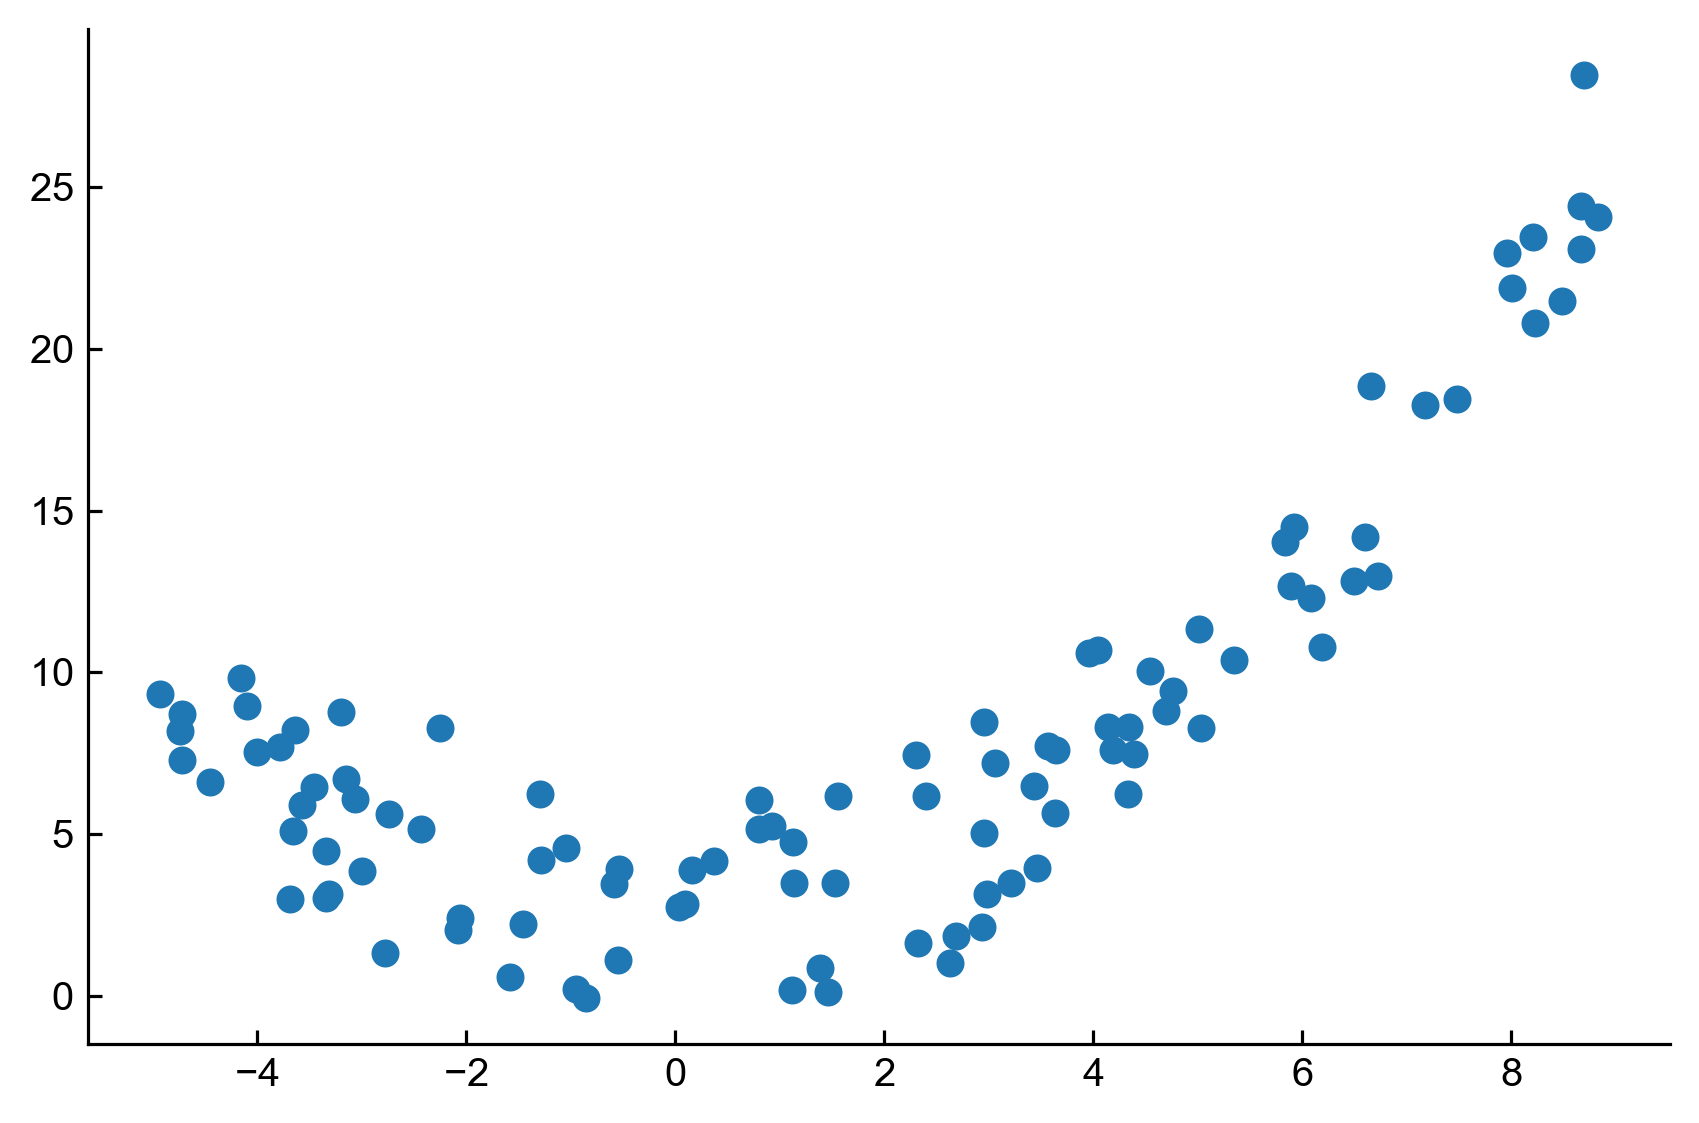

In [152]:
fig, ax = plt.subplots()
ax.scatter(X, Y)

### Using statsmodels 

In [153]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [154]:
# Initialise and fit non-linear regression model using `statsmodels`
model_quad = smf.ols('Y ~ X + I(X**2)', data=df2)
results_quad = model_quad.fit()

In [155]:
# Model summary
results_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     441.0
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           2.02e-49
Time:                        16:55:44   Log-Likelihood:                -209.87
No. Observations:                 100   AIC:                             425.7
Df Residuals:                      97   BIC:                             433.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6431      0.280      9.451      0.000       2.088       3.198
X              0.0558      0.069      0.814      0.417      -0.080       0.192
I(X ** 2)      0.2816      0.013     20.936      0.000       0.255       0.308
==============================================================================
Omnibus:                        7.970   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.227
Skew:                           0.076   Prob(JB):                        0.199
Kurtosis:                       2.133   Cond. No.                         39.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

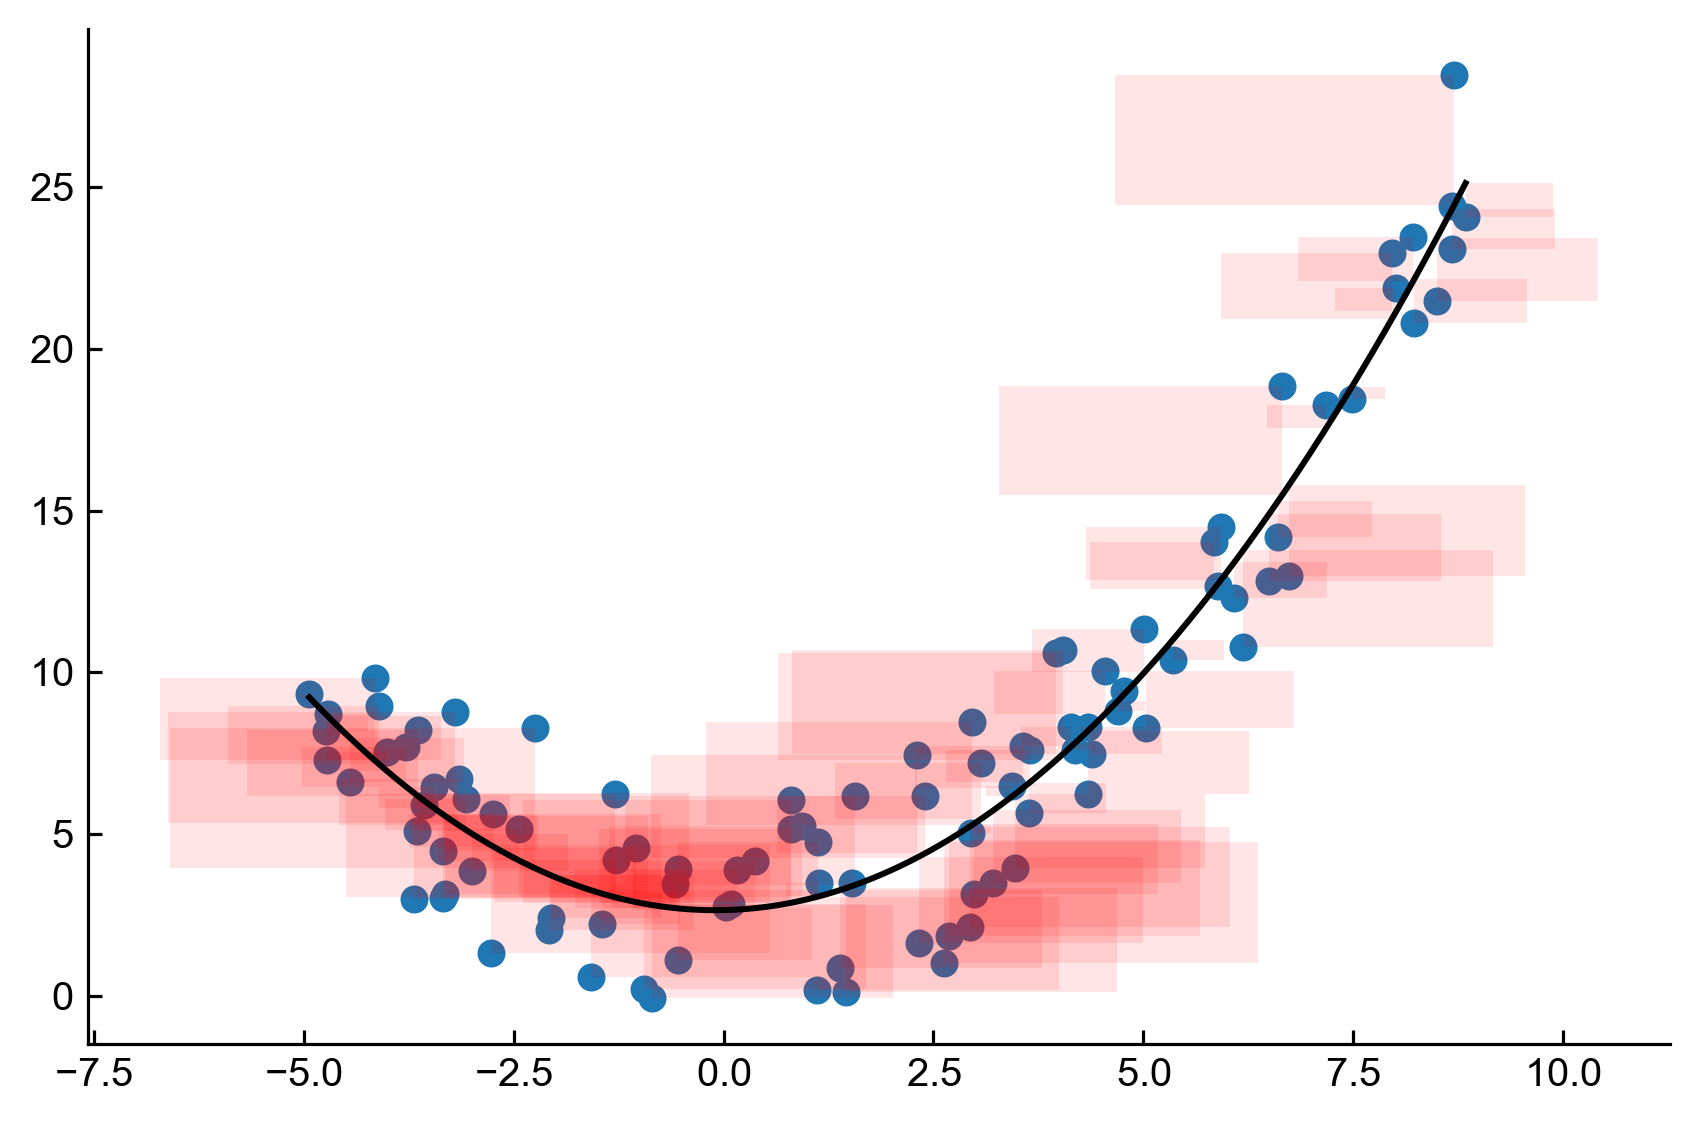

In [156]:
#Plotting the results
X = df2['X']
Y = df2['Y']

a, b, c = results_quad.params
def quad_model_pred(x):
    return(a + b*x + c*x**2)

fig, ax = plt.subplots()
ax.scatter(X, Y)
x_pred = np.linspace(X.min(), X.max(), 1000)
y_pred = quad_model_pred(x_pred)
ax.plot(x_pred, y_pred, color='k')

# Plotting residual error
for x, y in zip(X, Y):
    dy = quad_model_pred(x) - y
    #ax.plot([x, x], [y, y + dy], color='r', lw=.2, alpha=.2) # Uses lines 
    rect = mpl.patches.Rectangle((x, y), dy, dy, alpha=.1, color='r', lw=0) # Uses squares
    ax.add_patch(rect)

### Trying two different models, one more complex, one simpler

In [172]:
# Initialise and fit non-linear regression model using `statsmodels`
model_quintic= smf.ols('Y ~ X + I(X**2) + I(X**3) + I(X**4)', data=df2)
results_quintic = model_quintic.fit()
results_quintic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     216.7
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           7.78e-47
Time:                        04:30:23   Log-Likelihood:                -209.72
No. Observations:                 100   AIC:                             429.4
Df Residuals:                      95   BIC:                             442.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7662      0.368      7.526      0.000       2.036       3.496
X              0.0509      0.174      0.292      0.771      -0.295       0.397
I(X ** 2)      0.2655      0.035      7.537      0.000       0.196       0.335
I(X ** 3)      0.0002      0.010      0.018      0.986      -0.019       0.019
I(X ** 4)      0.0002      0.001      0.197      0.844      -0.002       0.002
==============================================================================
Omnibus:                        8.377   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                3.269
Skew:                           0.050   Prob(JB):                        0.195
Kurtosis:                       2.120   Cond. No.                     3.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [158]:
# Initialise and fit non-linear regression model using `statsmodels`
model_quad_simple= smf.ols('Y ~ I(X**2)', data=df2)
results_quad_simple = model_quad_simple.fit()
results_quad_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     884.4
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           7.51e-51
Time:                        16:55:46   Log-Likelihood:                -210.21
No. Observations:                 100   AIC:                             424.4
Df Residuals:                      98   BIC:                             429.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5906      0.272      9.535      0.000       2.051       3.130
I(X ** 2)      0.2891      0.010     29.739      0.000       0.270       0.308
==============================================================================
Omnibus:                        8.712   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                3.429
Skew:                           0.098   Prob(JB):                        0.180
Kurtosis:                       2.114   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

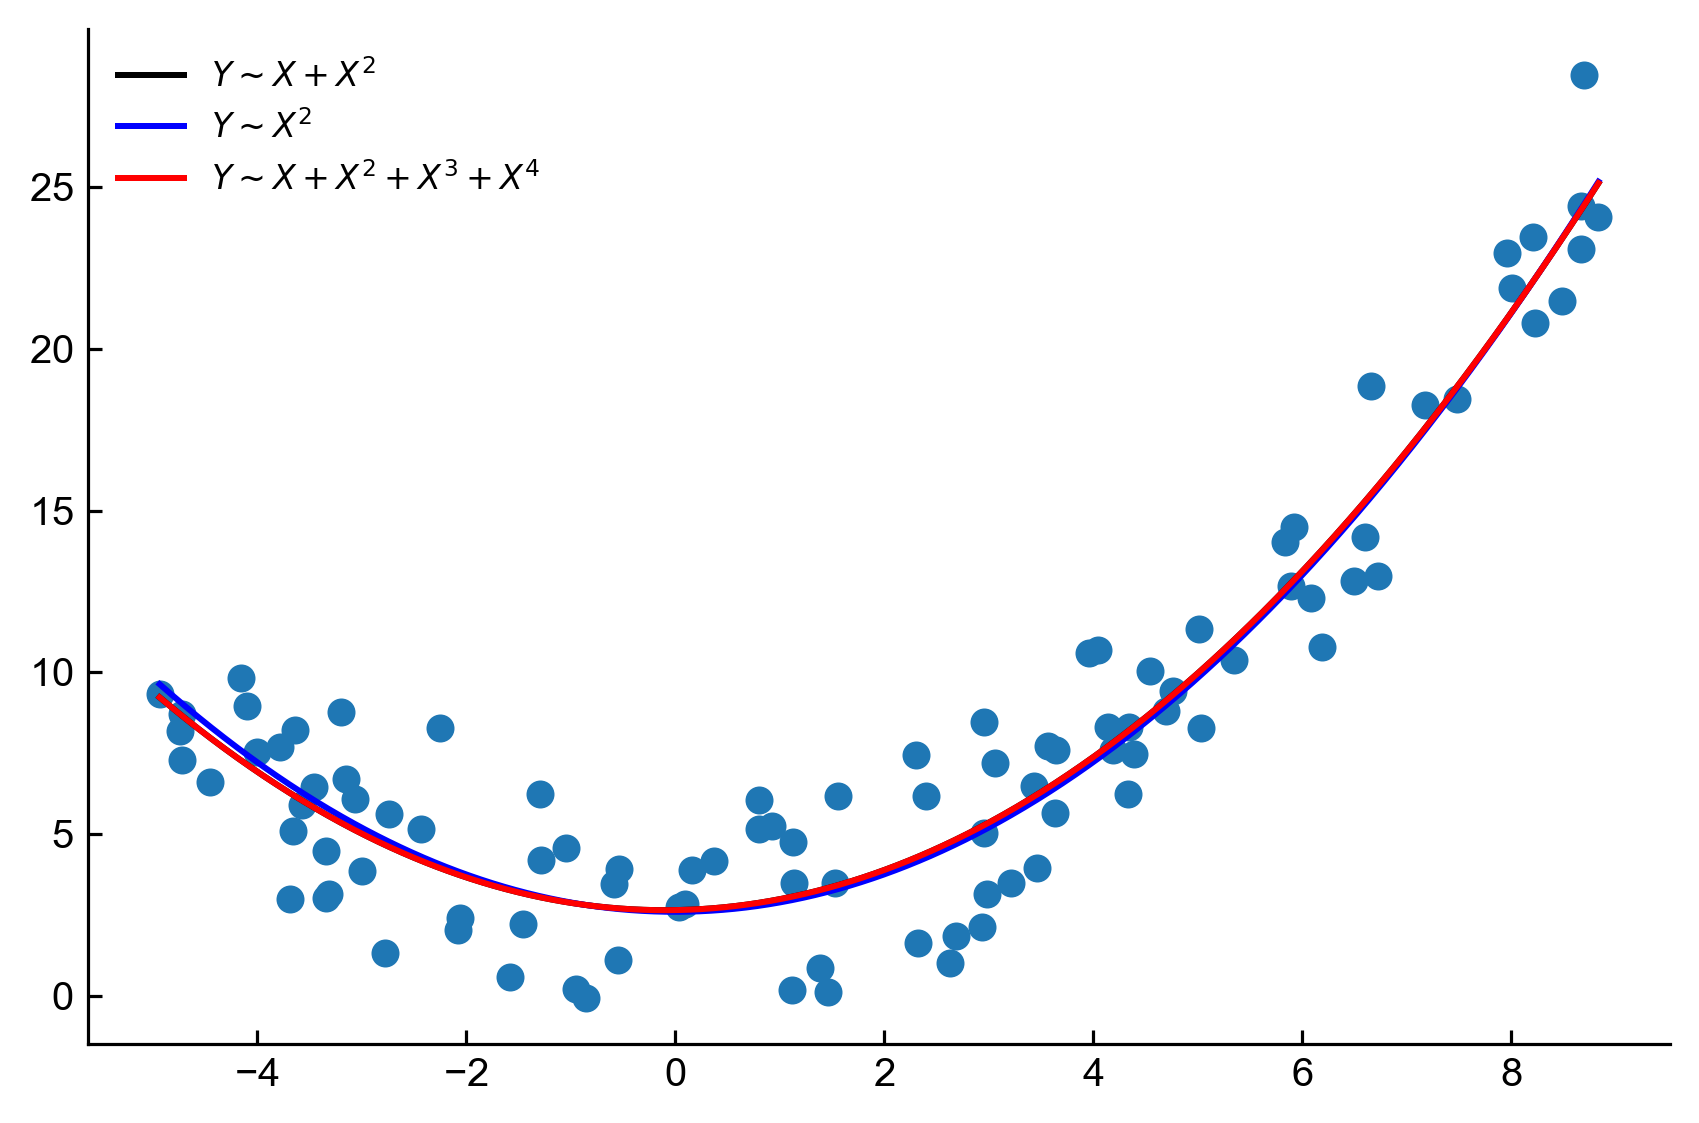

In [159]:
#Plotting the results
X = df2['X']
Y = df2['Y']

a, b, c = results_quad.params
a2, c2 = results_quad_simple.params
a3, b3, c3, d3, e3 = results_quintic.params

def quad_model_pred(x):
    return(a + b*x + c*x**2)
def quad_model_simple_pred(x):
    return(a2 + c2*x**2)
def quintic_model_pred(x):
    return(a3 + b3*x + c3*x**2 + d3*x**3 + e3*x**4)


fig, ax = plt.subplots()
ax.scatter(X, Y)
x_pred = np.linspace(X.min(), X.max(), 1000)
y_pred_1 = quad_model_pred(x_pred)
y_pred_2 = quad_model_simple_pred(x_pred)
y_pred_3 = quintic_model_pred(x_pred)

ax.plot(x_pred, y_pred_1, color='k', label="$Y \sim X + X^2$")
ax.plot(x_pred, y_pred_2, color='blue', label="$Y \sim X^2$")
ax.plot(x_pred, y_pred_1, color='red', label="$Y \sim X + X^2 + X^3 + X^4$")
ax.legend()

In [ ]:
# Exercise: Create some non-linear data and try different fits (both under and over fitting). 
# Compare fit quality using AIC. 







# Avoiding over-fitting

## Using regularizers

In [173]:
results_quintic.params

Intercept    2.766206
X            0.050916
I(X ** 2)    0.265517
I(X ** 3)    0.000169
I(X ** 4)    0.000222
dtype: float64

In [182]:
results_quintic_reg = model_quintic.fit_regularized(alpha=.1, L1_wt=.001)
results_quintic_reg.params

Intercept    2.094785
X            0.180935
I(X ** 2)    0.301495
I(X ** 3)   -0.008628
I(X ** 4)    0.000665
dtype: float64

In [ ]:
# Exercise: Create linear data with outliers and use regularization to control the effect 
# of these outliers. 








## Using cross validation 

In [184]:
# Complete the code below to use K-fold cross validation to find the best parameter of lambda

from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True)
print(kf)
possible_lambdas = np.linspace(0, 1, .1)
KFold(n_splits=2, random_state=None, shuffle=False)
for l in possible_lambdas:
    for train_index, test_index in kf.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
         # ???

KFold(n_splits=10, random_state=None, shuffle=True)
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 17 18 19 20 21 23 24 25 26
 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 46 47 48 49 51 52 53
 54 55 56 57 58 59 60 61 62 63 65 66 67 68 69 70 71 72 73 74 75 76 77 80
 81 82 83 84 85 86 87 88 89 91 92 93 94 95 96 97 98 99] TEST: [15 16 22 32 45 50 64 78 79 90]
TRAIN: [ 0  1  2  3  5  6  7  8  9 10 12 14 15 16 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 43 44 45 46 47 48 49 50 51 53 54
 55 56 57 58 59 60 61 62 63 64 65 67 68 69 70 71 72 73 74 75 76 77 78 79
 80 81 82 83 84 85 86 89 90 91 92 93 94 95 96 97 98 99] TEST: [ 4 11 13 17 41 42 52 66 87 88]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 16 17 18 19 20 21 22 24 25
 26 27 28 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 66 68 69 70 71 72 73 74 75 76 77 78
 79 80 82 83 84 85 87 88 90 91 92 93 94 95 96 97 98 99] TEST: [14 23 29 34 47 65 6